In [1]:
"""Pavan's Version of the SGOOP tutorial with elimination of noisy parameters and then self-consistency check"""
import sgoop
import scipy.optimize as opt
import numpy as np
import time
import matplotlib as plt

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [2]:
def opti_func(rc):
    global nfev
    nfev +=1
    return -sgoop.rc_eval(rc)

In [3]:
def print_fun(x, f, accepted):
    global now,last,nfev,lastf
    now=time.time()
    print(x,end=' ')
    if accepted == 1:
        print("with spectral gap %.4f accepted after %3i runs (%.3f)" % (-f, nfev-lastf, now-last))
    else:
        print("with spectral gap %.4f declined after %3i runs (%.3f)" % (-f, nfev-lastf, now-last))
    last=now
    lastf=nfev

In [4]:
def find_wells(prob):
    
    energy = []
    for i in (range(len(prob))):
        if prob[i] == 0:
            energy.append(np.inf)
        else:
            energy.append(-1 * np.log(prob[i]))
    
    wells = 0
    max = np.inf
    min = np.inf
    d = 1
    i = 0
    for x in energy:
        if x > max:
            max = x
            if (max - min > 1):
                min = x
                d = 1
        elif x < min:
            min = x
            if (max - min > 1):
                if d == 1:
                    wells = wells + 1
                max = x
                d = -1
        i = i + 1
    
    return wells

In [5]:
def initial_guess(wells):
    
    x = [-1, -1, -1, -1, -1, -1, -1, -1]
    rc = x
    max_val = 0
    sgoop.wells = wells
    
    while not x == [1, 1, 1, 1, 1, 1, 1, 1]:
        
        tmp = sgoop.rc_eval(x)
        if tmp > max_val:
            max_val = tmp
            rc = x.copy()
            
        for i in range(8):
            if x[7 - i] == -1:
                x[7 - i] = 1
                break;
            else:
                x[7 - i] = -1
                
    tmp = sgoop.rc_eval(x)
    if tmp > max_val:
        max_val = tmp
        rc = x.copy()
        
    return rc

In [6]:
# Calculating the optimal 2 well RC.
consistent = True
candidate_wells = 1

while (consistent == True):
    
    print("Testing " + str(candidate_wells) + " wells")
    
    guess = initial_guess(candidate_wells)
    
    sgoop.wells = candidate_wells
    start = time.time()
    last = start
    lastf = nfev = 0
    minimizer_kwargs = {"options": {"maxiter":10}}
    ret = opt.basinhopping(opti_func,guess,niter=100,T=.01,stepsize=.1, minimizer_kwargs=minimizer_kwargs, callback=print_fun)
    end = time.time()
    print(end-start)
    prob_space = sgoop.md_prob(ret.x)
    
    if (find_wells(prob_space) >= candidate_wells):
        print(str(candidate_wells) + " well runs accepted. Testing " + str(candidate_wells + 1) + " well RC.")
        rc = ret.x.copy()
        candidate_wells = candidate_wells + 1
    else:
        print(str(candidate_wells) + " well runs failed. Reverting to previous RC.")
        consistent = False
        
    print()

rc



Testing 1 wells
[ 0.920  0.998  0.941  1.040  0.940  0.916 -0.916 -1.001] with spectral gap 0.0235 accepted after  20 runs (0.023)
[ 0.840  0.944  1.032  1.020  0.921  0.866 -0.929 -1.007] with spectral gap 0.0205 accepted after  10 runs (0.012)
[ 0.831  0.979  0.975  0.928  0.973  0.796 -0.903 -1.041] with spectral gap 0.0238 accepted after  10 runs (0.011)
[ 0.797  1.018  1.000  0.947  0.968  0.822 -0.936 -0.980] with spectral gap 0.0221 declined after  10 runs (0.012)
[ 0.903  0.988  0.960  0.953  0.941  0.792 -0.826 -1.134] with spectral gap 0.0225 accepted after  10 runs (0.011)
[ 0.926  1.072  0.964  0.910  0.861  0.876 -0.841 -1.142] with spectral gap 0.0227 accepted after  10 runs (0.011)
[ 0.866  1.167  0.940  0.881  0.778  0.882 -0.810 -1.114] with spectral gap 0.0000 declined after  10 runs (0.012)
[ 0.834  1.036  0.955  0.868  0.794  0.818 -0.869 -1.165] with spectral gap 0.0237 accepted after  10 runs (0.011)
[ 0.799  1.134  1.003  0.919  0.817  0.725 -0.807 -1.103] with s

[ 0.466  0.940  1.265  1.527  0.856  0.942 -0.499 -0.694] with spectral gap 0.0000 accepted after  10 runs (0.017)
[ 0.548  0.943  1.361  1.426  0.866  0.848 -0.461 -0.601] with spectral gap 0.0000 accepted after  10 runs (0.015)
[ 0.547  0.916  1.347  1.332  0.867  0.740 -0.403 -0.513] with spectral gap 0.0000 accepted after  10 runs (0.013)
[ 0.555  0.996  1.345  1.405  0.962  0.712 -0.312 -0.601] with spectral gap 0.0000 accepted after  10 runs (0.013)
[ 0.647  0.980  1.347  1.316  1.063  0.639 -0.251 -0.570] with spectral gap 0.0000 accepted after  10 runs (0.012)
[ 0.561  0.896  1.304  1.404  1.101  0.548 -0.311 -0.493] with spectral gap 0.0158 accepted after  10 runs (0.012)
[ 0.665  0.975  1.409  1.499  1.208  0.550 -0.278 -0.419] with spectral gap 0.0152 accepted after  10 runs (0.012)
[ 0.729  0.971  1.303  1.504  1.273  0.644 -0.294 -0.445] with spectral gap 0.0143 accepted after  10 runs (0.012)
[ 0.741  1.071  1.316  1.413  1.272  0.613 -0.307 -0.429] with spectral gap 0.01

[-1.098 -0.730  0.684  0.719  1.274 -1.262  1.104  0.862] with spectral gap 0.0570 declined after  10 runs (0.015)
[-0.975 -0.721  0.753  0.747  1.317 -1.210  1.006  0.776] with spectral gap 0.0585 accepted after  10 runs (0.020)
[-0.969 -0.780  0.810  0.680  1.340 -1.220  0.996  0.884] with spectral gap 0.0577 accepted after  10 runs (0.016)
[-1.007 -0.793  0.844  0.704  1.278 -1.177  0.969  0.846] with spectral gap 0.0570 accepted after  10 runs (0.017)
[-0.897 -0.815  0.921  0.678  1.312 -1.141  1.069  0.800] with spectral gap 0.0581 accepted after  10 runs (0.017)
[-0.838 -0.798  0.978  0.606  1.292 -1.121  1.064  0.823] with spectral gap 0.0000 declined after  10 runs (0.014)
[-0.792 -0.805  0.978  0.586  1.411 -1.128  0.985  0.873] with spectral gap 0.0000 declined after  10 runs (0.015)
[-0.860 -0.788  0.966  0.669  1.263 -1.065  1.067  0.887] with spectral gap 0.0000 declined after  10 runs (0.015)
[-0.868 -0.784  0.903  0.658  1.272 -1.040  1.016  0.845] with spectral gap 0.00

array([ 1.178,  1.248,  1.029,  0.917,  0.688,  0.565, -0.509, -1.159])

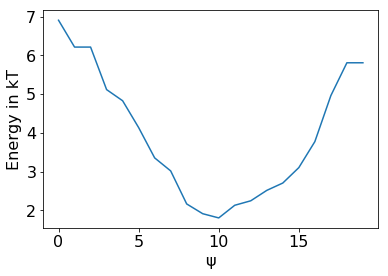

[-1.052, -0.932, -0.976, -1.028, -1.053, -0.915, 1.081, 1.023]


In [4]:
# Graphing the optimal RC with the most wells
rc = [-1.052, -0.932, -0.976, -1.028, -1.053, -0.915, 1.081, 1.023]
p=sgoop.md_prob(rc)
plt.rcParams.update({'font.size': 16})
plt.pyplot.xlabel("\u03C8")
plt.pyplot.ylabel("Energy in kT")
plt.pyplot.plot(-np.ma.log(p))
plt.pyplot.show()
print(rc)
print(str(candidate_wells - 1) + " well(s)")